<h2><a href="https://leetcode.com/problems/range-frequency-queries">2080. Range Frequency Queries</a></h2><h3>Medium</h3><hr><p>Design a data structure to find the <strong>frequency</strong> of a given value in a given subarray.</p>

<p>The <strong>frequency</strong> of a value in a subarray is the number of occurrences of that value in the subarray.</p>

<p>Implement the <code>RangeFreqQuery</code> class:</p>

<ul>
	<li><code>RangeFreqQuery(int[] arr)</code> Constructs an instance of the class with the given <strong>0-indexed</strong> integer array <code>arr</code>.</li>
	<li><code>int query(int left, int right, int value)</code> Returns the <strong>frequency</strong> of <code>value</code> in the subarray <code>arr[left...right]</code>.</li>
</ul>

<p>A <strong>subarray</strong> is a contiguous sequence of elements within an array. <code>arr[left...right]</code> denotes the subarray that contains the elements of <code>nums</code> between indices <code>left</code> and <code>right</code> (<strong>inclusive</strong>).</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input</strong>
[&quot;RangeFreqQuery&quot;, &quot;query&quot;, &quot;query&quot;]
[[[12, 33, 4, 56, 22, 2, 34, 33, 22, 12, 34, 56]], [1, 2, 4], [0, 11, 33]]
<strong>Output</strong>
[null, 1, 2]

<strong>Explanation</strong>
RangeFreqQuery rangeFreqQuery = new RangeFreqQuery([12, 33, 4, 56, 22, 2, 34, 33, 22, 12, 34, 56]);
rangeFreqQuery.query(1, 2, 4); // return 1. The value 4 occurs 1 time in the subarray [33, 4]
rangeFreqQuery.query(0, 11, 33); // return 2. The value 33 occurs 2 times in the whole array.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= arr.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= arr[i], value &lt;= 10<sup>4</sup></code></li>
	<li><code>0 &lt;= left &lt;= right &lt; arr.length</code></li>
	<li>At most <code>10<sup>5</sup></code> calls will be made to <code>query</code></li>
</ul>
?

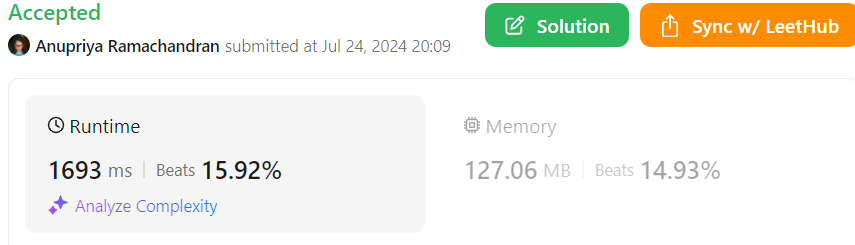

In [1]:
from typing import List

class RangeFreqQuery:

    def __init__(self, arr: List[int]):
        self.n = len(arr)
        self.arr = arr
        # self.tree = [0] * (4* self.n )
        self.tree =[None]* (4*self.n)
        self.buildTree( 0, 0, self.n -1)

    def buildTree(self,  idx, start, end):
        if start == end:
            self.tree[idx] ={self.arr[start]: 1}
        else:
            mid = (start + end)//2
            left_child = 2*idx + 1
            right_child = 2*idx +2
            self.buildTree( left_child, start, mid)
            self.buildTree(right_child, mid + 1, end)
            # self.tree[idx] = self.tree[2*idx + 1] + self.tree[2*idx + 2] 
            self.tree[idx] = self.merge(self.tree[left_child], self.tree[right_child])


    def merge(self, left_dict, right_dict):
        merged = {}
        for key in left_dict:
            merged[key] = merged.get(key, 0) + left_dict[key]

        for key in right_dict:
            merged[key] = merged.get(key, 0) + right_dict[key]

        return merged


    def queryfreq(self, arr, idx, start, end, l, r, key):
        if r < start or l > end:
            return 0

        if l <= start and r >= end:
            return self.tree[idx].get(key, 0)

        mid = (start + end)//2
        left_child = 2 * idx + 1
        right_child = 2 * idx + 2
        left_freq = self.queryfreq(arr, left_child, start, mid, l, r, key)
        right_freq = self.queryfreq(arr, right_child, mid + 1, end, l, r, key)
        return left_freq + right_freq

        

    def query(self, left: int, right: int, value: int) -> int:
        return self.queryfreq( self.arr, 0, 0, self.n -1 , left, right, value)
        


# Your RangeFreqQuery object will be instantiated and called as such:
# obj = RangeFreqQuery(arr)
# param_1 = obj.query(left,right,value)